# MNIST digit classification (image classification)

Build a neural network that can recognize handwritten digits (0–9) using the MNIST dataset — one of the most common "hello world" datasets for deep learning.

A high-level algorithm describing the implementation steps we followed for the MNIST digit classification:

1.  **Load the Dataset:**
    *   Load the MNIST training and test datasets (images and labels) using `mnist.load_data()`.

2.  **Preprocess the Data:**
    *   **Normalize** the image pixel values by scaling them from the original range (0-255) to a smaller range (0-1) by dividing by 255.0.
    *   **Reshape** the image data to add a channel dimension, making the shape suitable for convolutional layers (e.g., from (samples, height, width) to (samples, height, width, 1)).
    *   **One-Hot Encode** (optional) the integer labels into a binary vector format (e.g., convert the digit '3' to [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).

3.  **Build the Neural Network Model:**
    *   Define a **Sequential** model in Keras.
    *   Add **Convolutional (Conv2D)** layers to extract features from the images.
    *   Add **Pooling (MaxPooling2D)** layers to reduce the spatial dimensions and computation.
    *   Add a **Flatten** layer to convert the 2D feature maps into a 1D vector.
    *   Add **Dense (fully connected)** layers for classification.
    *   Add a final Dense layer with a **softmax** activation function to output class probabilities.

4.  **Compile the Model:**
    *   Configure the model for training using `model.compile()`.
    *   Specify the **optimizer** (e.g., 'adam') to define how the model's weights will be updated.
    *   Specify the **loss function** (e.g., 'categorical_crossentropy') to measure the model's error.
    *   Specify the **metrics** (e.g., ['accuracy']) to evaluate the model's performance.

5.  **Train the Model:**
    *   Train the model using the `model.fit()` method.
    *   Provide the preprocessed training data and labels.
    *   Specify the number of **epochs** (iterations over the dataset).
    *   Specify the **batch size** (number of samples per gradient update).
    *   Optionally, use a `validation_split` to monitor performance on a portion of the training data during training.

6.  **Evaluate Model Performance:**
    *   Evaluate the trained model on the unseen test dataset using `model.evaluate()`.
    *   Get the test loss and test accuracy.

7.  **Visualize Training History (Optional but Recommended):**
    *   Plot the training and validation accuracy and loss over epochs using the `history` object returned by `model.fit()` to visualize the training progress and check for overfitting.

8.  **Make Predictions (Optional):**
    *   Use the trained model to make predictions on new, unseen images using `model.predict()`.

This algorithm covers the main steps involved in implementing the MNIST digit classification using a neural network in Keras.

In [16]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

## How to load and preprocess image data

### Load the dataset

First, we'll load the MNIST dataset. It's conveniently included in TensorFlow's datasets module.

The `tensorflow.keras.datasets` module contains several commonly used datasets for machine learning and deep learning. Here are some of the datasets you can find in this module:

* mnist: The MNIST database of handwritten digits.
* cifar10: The CIFAR10 dataset of 32x32 color images in 10 classes.
* cifar100: The CIFAR100 dataset of 32x32 color images in 100 classes.
* imdb: The IMDB dataset of movie reviews, for binary sentiment classification.
* reuters: The Reuters newswire topics classification dataset.
* fashion_mnist: A dataset of 28x28 grayscale images of 10 fashion categories.

These datasets are pre-processed and ready to be loaded directly into your TensorFlow Keras workflows, making it convenient for experimenting and learning.

In [17]:
# load the example dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Preprocess the data

For a neural network-based deep learning implementation, common preprocessing steps for image data like the MNIST dataset include:


1.   Normalization: Scaling the pixel values to a range between 0 and 1. This helps the model converge faster and perform better.
2.   Reshaping: Reshaping the images to the format expected by the neural network (e.g., adding a channel dimension for grayscale images).
3.   One-Hot Encoding (for labels): Converting the integer labels (0-9) into a one-hot encoded format. This is necessary for categorical cross-entropy loss, which is often used in multi-class classification problems.







We normalize the pixel values by dividing by 255.0, the maximum possible pixel value. This scales the data to a range between 0 and 1.

In [18]:
# Normalize the pixel values from 0-255 to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Normalizing the pixel values from the range of 0-255 to 0-1 is a common and important preprocessing step in image-based machine learning for several reasons:

* Improved Training Performance: Neural networks, especially those using gradient-based optimization methods (like Adam or SGD), tend to perform better and converge faster when the input data is scaled to a smaller, consistent range. Large input values can lead to large gradients, which can cause the optimization process to oscillate or diverge. Scaling to 0-1 helps keep gradients within a manageable range.
* Preventing Activation Saturation: Some activation functions commonly used in neural networks (like the sigmoid or tanh functions, although ReLU is more common now) can saturate when inputs are very large or very small. Saturation means the gradient of the activation function becomes very close to zero, which can hinder the learning process in the layers where saturation occurs. Scaling inputs to 0-1 helps prevent this.
* Consistent Feature Scales: While pixel values are often in the same range (0-255), other datasets might have features with vastly different scales. Normalization ensures that all features contribute roughly equally to the learning process, preventing features with larger values from dominating those with smaller values. Even within image data, subtle variations in lighting could affect the absolute pixel values, and normalization helps to mitigate this.
* Compatibility with Activation Functions: The range of 0-1 is often a good input range for certain activation functions or layers in a neural network.

In essence, normalization helps to create a more stable and efficient training process for the neural network, leading to better performance and faster convergence.

The type of normalization used can depend on the data and the specific machine learning model, but for image data like the MNIST dataset, scaling pixel values from 0-255 to 0-1 (as we did by dividing by 255.0) is a very common technique. This is a form of Min-Max Scaling, where the original range of values is scaled to a specific target range, in this case [0, 1].

Other common types of normalization include:

* Standardization (Z-score normalization): This transforms the data to have a mean of 0 and a standard deviation of 1. It's calculated as (x - mean) / standard deviation. This is often used when the data has a Gaussian distribution.
* Mean Normalization: This centers the data around zero by subtracting the mean, but doesn't divide by the standard deviation. It's calculated as (x - mean) / (max - min).
* Unit Vector Normalization: This scales each sample (row of data) to have a unit norm (a length of 1). This is often used in text processing or when the magnitude of the vector is not as important as its direction.

For image data where the pixel values have a known, fixed range (like 0-255), Min-Max scaling to [0, 1] or [-1, 1] is very prevalent and effective. Standardizaton can also be used, especially if the pixel value distribution is roughly Gaussian.

In [19]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


We reshape the data to include a channel dimension. For grayscale images like MNIST, the shape is typically (number_of_images, height, width, 1).

In [20]:
# Reshape the data (add channel dimension for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

This code snippet reshapes the `x_train` and `x_test` arrays.

* `x_train.reshape(x_train.shape[0], 28, 28, 1)`: This line reshapes the training data.
** `x_train.shape[0]` is the number of samples (images) in the training set (which is 60,000 for MNIST).
** `28, 28` are the height and width of the images (28x28 pixels).
** `1` is the number of color channels. Since the MNIST images are grayscale, they have only one channel. This reshaping adds this channel dimension, which is required by many convolutional neural network (CNN) layers in TensorFlow/Keras.
* `x_test.reshape(x_test.shape[0], 28, 28, 1)`: This line does the same reshaping for the test data.

In essence, this code transforms the image data from a 3-dimensional array (samples, height, width) to a 4-dimensional array (samples, height, width, channels), making it compatible with the input requirements of convolutional layers in a neural network.

In [21]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


We convert the integer labels into a one-hot encoded format. This is necessary for the categorical cross-entropy loss function used in multi-class classification.

In [22]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

This code snippet performs one-hot encoding on the training and test labels (`y_train` and `y_test`).

* `tf.keras.utils.to_categorical(y_train, num_classes=10)`: This function from TensorFlow/Keras converts the integer labels in `y_train` into a one-hot encoded format.
** The original `y_train` contains integer values representing the digits (0-9).
** `num_classes=10` specifies that there are 10 possible classes (digits).
** The function creates a new array where each original integer label is converted into a vector of length 10. For example, the label `3` would become `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.
* y_test = `tf.keras.utils.to_categorical(y_test, num_classes=10)`: This line does the same one-hot encoding for the test labels.

One-hot encoding is crucial for multi-class classification problems when using categorical cross-entropy as the loss function, as it provides a target vector that matches the output shape of the neural network's final layer (which typically has a node for each class).

In [23]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


## How to build and train a neural network

The t`ensorflow.keras.models` library provides several classes for building different types of neural network models. The two most commonly used are:

* `Sequential`: This is the simplest type of model, where layers are stacked in a linear fashion. It's suitable for building basic feedforward neural networks. You've already used this type of model to build the digit recognition model.
* `Functional` API: This allows you to build models with more flexible architectures, including models with multiple inputs, multiple outputs, and shared layers. It's more powerful than the Sequential model and is used for more complex network designs.
* `Model` subclassing: This is the most flexible way to build models in Keras. You define your model by creating a class that inherits from `tf.keras.Model` and defining the layers and the forward pass in the `__init__` and `call` methods, respectively. This is useful for highly customized models.

Choosing the right Keras model type depends on the complexity and structure of the neural network you want to build:

* `Sequential`: Use this when you have a simple, linear stack of layers with a single input and a single output. It's the easiest to use for basic models. The MNIST digit recognition model we built is a good example of when to use a Sequential model.
* `Functional` API: Use this when your model has a more complex structure, such as multiple inputs, multiple outputs, shared layers, or non-sequential connections (like skip connections in residual networks). It provides more flexibility than Sequential while still being relatively easy to understand and use.
* `Model` subclassing: Use this when you need the highest level of flexibility and control over the model's behavior. This is particularly useful for building models with custom forward passes, complex control flow, or when you want to implement a custom layer or a research-oriented model architecture. It requires more coding but offers the most power.

In summary:
* Simple, linear stack: Sequential
* Multiple inputs/outputs, shared layers, non-sequential connections: Functional API
* Highest flexibility, custom behavior, research: Model subclassing

### Build the neural network

For image classification tasks like the MNIST dataset, a **Convolutional Neural Network (CNN)** is typically the most effective type of neural network.

CNNs are designed to automatically learn spatial hierarchies of features from images, making them highly suitable for tasks involving visual data. They use convolutional layers to extract features and pooling layers to reduce dimensionality, followed by dense layers for classification.

Build a simple sequential model. Flatten the 28x28x1 images into a 784-element vector and then add a dense layer with 128 neurons and a final output layer with 10 neurons (one for each digit).

Define the model architecture using the `Sequential` model from Keras. We define the layers of the neural network in a linear stack.

In [24]:
# Build the CNN model
model = Sequential([
    # Convolutional layer 1
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output from convolutional layers
    Flatten(),

    # Dense layer
    Dense(128, activation='relu'),

    # Output layer
    Dense(10, activation='softmax') # 10 classes for digits 0-9
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The phrase ("a simple, linear stack of layers with a single input and a single output") describes the typical architecture of a neural network built using the Sequential model in Keras.
Let's break it down:
* Simple, linear stack of layers: This means the layers in the neural network are arranged one after another in a straight line. The output of one layer serves as the input to the next layer, and there are no branching paths or complex connections between layers. Think of it like a pipeline where data flows in one direction from the input to the output through each layer in sequence.
* Single input: The network receives one type of data as its starting point. In our MNIST example, the single input is the image of the handwritten digit.
* Single output: The network produces one result at the end. In the MNIST example, the single output is the prediction of which digit the image represents (a probability distribution over the 10 digits).

So, a "simple, linear stack of layers with a single input and a single output" refers to a straightforward neural network where data enters at one point, passes through a series of layers in order, and exits as a single result. This is the most basic type of neural network architecture and is well-suited for many common tasks.

This code snippet defines a Convolutional Neural Network (CNN) model using the Keras `Sequential` API. Here's a breakdown of the layers:

* `Sequential([...])`: This creates a linear stack of layers.
* `tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))`: This is the first convolutional layer.
** `32`: The number of filters (output channels) the layer will learn.
** `kernel_size=(3, 3)`: The size of the convolution window (a 3x3 matrix).
** `activation='relu'`: The activation function used (Rectified Linear Unit).
** `input_shape=(28, 28, 1)`: The shape of the input data (28x28 pixels with 1 channel for grayscale). This is only needed for the first layer.
* `tf.keras.layers.MaxPooling2D(pool_size=(2, 2))`: This is a max pooling layer.
** `pool_size=(2, 2)`: The size of the pooling window. It reduces the spatial dimensions (height and width) of the input by taking the maximum value within each window. This helps to reduce the number of parameters and computation, and makes the model more robust to small translations in the input.
* `tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')`: This is the second convolutional layer, similar to the first but with 64 filters.
* `tf.keras.layers.MaxPooling2D(pool_size=(2, 2))`: Another max pooling layer to further reduce dimensionality.
* `Flatten()`: This layer flattens the output from the convolutional and pooling layers into a 1D array (vector). Takes the 28x28x1 pixel image and flattens it into a single vector of 784 elements. This is necessary because the subsequent dense layers expect a 1D input. Thus, to connect the convolutional part of the network to the fully connected (dense) layers.
* `Dense(128, activation='relu')`: This is a fully connected (dense) layer with 128 neurons. The `relu` (Rectified Linear Unit) activation function is applied to the output of this layer, introducing non-linearity into the model.
* `Dense(10, activation='softmax')`: This is the output layer.
** `10`: The number of neurons, corresponding to the 10 classes (digits 0-9).
** `activation='softmax'`: The softmax activation function, which produces (outputs) a probability distribution over the 10 classes, meaning the output values for each image will sum up to 1, and each value represents the model's confidence that the image belongs to that digit class. The output of this layer will be a vector where each element represents the probability that the input image belongs to that class.

This architecture is a common and effective starting point for image classification tasks like MNIST.

### Compile the model

When we talk about "compiling" a neural network model in TensorFlow/Keras, we're not referring to a traditional code compiler. Instead, we're configuring the model for the training process. This involves specifying three key components:

1. **Optimizer**: This is the algorithm used to update the model's weights during training to minimize the loss function. Popular choices for this type of task include Adam, RMSprop, or SGD.
2. **Loss Function**: This measures how well the model is performing. For multi-class classification with one-hot encoded labels (which we have after preprocessing), categorical cross-entropy is the standard choice.
3. **Metrics**: These are used to evaluate the model's performance during training and testing. Accuracy is a common metric for classification problems, indicating the proportion of correctly classified samples.

For the MNIST digit classification task, I recommend using:
* **Optimizer**: 'adam' (a good general-purpose optimizer)
* **Loss Function**: 'categorical_crossentropy' (because we used one-hot encoding for the labels)
* **Metrics**: ['accuracy']

Note: use `loss='sparse_categorical_crossentropy'` when you skip the one-hot encoding for labels step

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

This code compiles the neural network model that was defined earlier. The `model.compile()` method configures the model for training by specifying the following:
* `optimizer='adam'`: This sets the optimizer to 'adam'. The optimizer is the algorithm that updates the model's weights during training to minimize the loss function. Adam is a popular and generally effective optimizer.
* `loss='categorical_crossentropy'`: This sets the loss function to 'categorical_crossentropy'. The loss function measures how well the model is performing. For multi-class classification problems where the labels are one-hot encoded (as we did with the MNIST labels), categorical cross-entropy is the standard choice. It calculates the difference between the predicted probability distribution and the true distribution.
* `metrics=['accuracy']`: This specifies the metric to be used to evaluate the model's performance during training and testing. 'accuracy' calculates the proportion of correctly classified samples.

In summary, this code prepares the model for training by defining how the model will learn (optimizer), what it aims to minimize (loss function), and how its performance will be measured (metrics).

Note: `loss='sparse_categorical_crossentropy'`: This defines the loss function that the model will try to minimize during training. For multi-class classification problems like MNIST, `sparse_categorical_crossentropy` is a common choice when the labels are integers (0, 1, 2, etc.).

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

`model.summary()`, is used to display a concise summary of the neural network model's architecture.

The output provides information about:

* **Layers**: It lists each layer in the model in order.
* **Output Shape**: It shows the shape of the output tensor for each layer. (`None, ...)` indicates the batch size is not fixed. You can see how the dimensions change after each convolutional and pooling layer, and how the `Flatten` layer converts the 3D output to a 1D vector.
* **Param #**: This column shows the number of trainable parameters in each layer. These are the weights and biases that the model will learn during training. Layers like `MaxPooling2D` have 0 parameters because they perform a fixed operation without learning.
* **Total params**: The total number of trainable parameters in the entire model.
* **Trainable params**: The number of parameters that will be updated during the training process.
* **Non-trainable params**: The number of parameters that are fixed and will not be updated during training (often seen when using pre-trained models).

The model summary is very useful for understanding the structure of your network, verifying the output shapes at each stage, and getting an idea of the model's complexity (based on the number of parameters).

In the context of neural networks and the model summary, "trainable parameters" and "non-trainable parameters" refer to the weights and biases within the network that are adjusted during the training process.

* Trainable parameters: These are the parameters in the model that the optimization algorithm (like Adam) will update during the training process. These are typically the weights and biases of the layers in your network. The goal of training is to find the best values for these trainable parameters to minimize the loss function and improve the model's performance on the task. In our MNIST model, the weights and biases in the `Dense` layers are trainable parameters.
* Non-trainable parameters: These are parameters in the model that are not updated during the standard training process using backpropagation and the optimizer. These can include parameters from layers that are frozen (their weights are fixed), or statistics that are calculated during training but not directly optimized, such as the mean and variance in Batch Normalization layers (although our simple model doesn't have these). In your model summary for the MNIST model, the `Flatten` layer has 0 parameters, and since it's just reshaping the data, it doesn't have any trainable parameters either.

The model summary shows the total number of parameters and then breaks them down into trainable and non-trainable. For a typical feedforward network like the one we built, all parameters are usually trainable unless you specifically freeze some layers.

### Train the model

To train the model, we use the `model.fit()` method. This method takes the training data and labels, and iteratively adjusts the model's weights to minimize the loss function. We'll also specify the number of epochs (how many times the model sees the entire training dataset) and the batch size (the number of samples per gradient update).

In [27]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9000 - loss: 0.3250 - val_accuracy: 0.9848 - val_loss: 0.0534
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9850 - loss: 0.0478 - val_accuracy: 0.9898 - val_loss: 0.0396
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9916 - loss: 0.0286 - val_accuracy: 0.9892 - val_loss: 0.0355
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9926 - loss: 0.0211 - val_accuracy: 0.9860 - val_loss: 0.0467
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9947 - loss: 0.0157 - val_accuracy: 0.9910 - val_loss: 0.0355
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.9920 - val_loss: 0.0381
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9897 - val_loss: 0.0420
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9983 -

This code trains the neural network model using the `model.fit()` method.
The `model.fit()` function is the core method in Keras used to train your neural network model. This is the method called on your compiled Keras model (model) to start the training process.

Here's a breakdown of the arguments:
* `x_train`: This is the training data (the images / features).  that the model will use for training. In our MNIST example, this is the set of 60,000 images of handwritten digits.
* `y_train`: This is the training labels (the integer / one-hot encoded digits) corresponding to the x_train. For MNIST, these are the actual digits (0-9) that each image represents. The model learns to predict these labels based on the input images.
* `epochs=10`: This specifies the number of epochs to train for. An epoch is one complete pass through the entire training dataset. Training for multiple epochs allows the model to learn from the data multiple times and improve its performance. The model will iterate over the entire training dataset 10 times.  Setting epochs=10 means the model will iterate over all 60,000 training images 10 times during the training process. More epochs generally allow the model to learn more, but can also lead to overfitting if the number is too high.
* `batch_size=32`: This specifies the number of samples per gradient update. The training data is divided into smaller batches (of 32 images), and the model's weights are updated after processing each batch, rather than after processing the entire dataset (which would be one large batch). Setting batch_size=32 means the training data is split into batches of 32 images. The model will process 32 images, calculate the loss, compute the gradients using backpropagation, and then update its weights before moving on to the next batch. Using batches makes the training process more memory-efficient and can help with convergence.
* `validation_split=0.1`: This argument tells Keras to automatically set aside a fraction of the training data to be used as validation data. Setting validation_split=0.1 means 10% of the x_train and y_train data will be held back and used to evaluate the model's performance *during* training, but *not* for updating the model's weights. This reserved 10% of the training data to be used as validation data is used to monitor the model's performance on unseen data during training. The model's performance on this validation set is evaluated at the end of each epoch. This helps to monitor for overfitting (when the model performs well on the training data but poorly on unseen data). This is crucial for monitoring overfitting; if the model performs much better on the training data than the validation data, it's likely overfitting.

In summary, `model.fit()` trains the model by feeding it the training data in batches for a specified number of epochs, using a portion of the data for validation to monitor performance.

The `model.fit()` method returns a `history` object, which contains information about the training process, such as the loss and accuracy values for both the training and validation sets at each epoch. This history can be used to visualize the training progress.

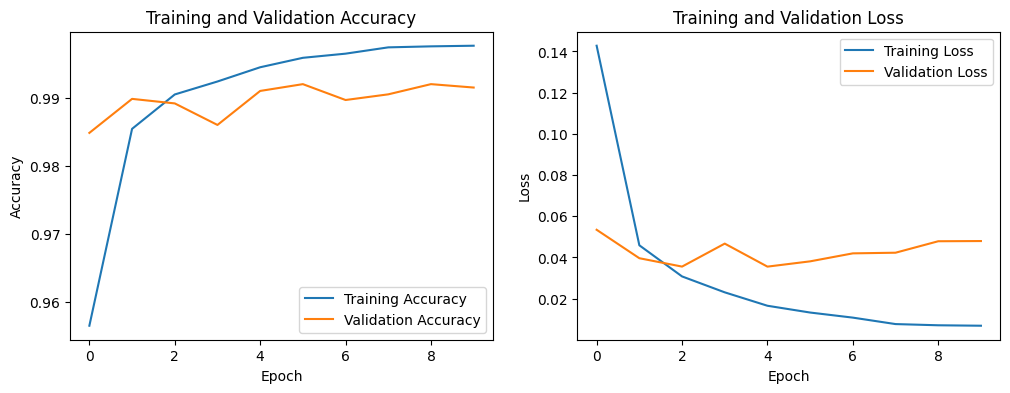

In [28]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Visualize the training history to see how the model's accuracy and loss changed during training. Plot the accuracy and loss over the training epochs to see how the model improved during training.

The plots show how the model's accuracy increased and loss decreased during training for both the training and validation sets.

The core mechanism of how neural networks learn! Backpropagation and the optimizer work hand-in-hand during training to adjust the model's weights and biases to minimize the loss.

Here's a breakdown:

* Forward Pass: When you train a neural network, data is fed forward through the layers. Each layer performs calculations using its current weights and biases, and the output of one layer becomes the input to the next. This continues until the final output layer produces a prediction.
* Calculate the Loss: The prediction from the network is compared to the actual target (the correct label for the data). A loss function (like `[sparse_]categorical_crossentropy` in our MNIST example) calculates how "wrong" the prediction is. A higher loss means the prediction is further from the actual target.
* Backpropagation: This is the crucial step where the network figures out how much each parameter (weight and bias) contributed to the loss. Backpropagation works backward through the network, calculating the gradient of the loss with respect to each parameter. The gradient tells us the direction and magnitude of the change in loss if we were to slightly adjust that parameter.
* Optimizer: This is where the optimizer (like Adam in our example) comes in. The optimizer uses the gradients calculated during backpropagation to update the model's trainable parameters. It uses different algorithms to determine how to adjust the parameters based on the gradients to effectively reduce the loss. The optimizer's goal is to find the set of weights and biases that minimizes the loss function across the entire training dataset.

In simpler terms:
* Backpropagation tells you how to change each parameter to reduce the error (loss).
* The Optimizer uses that information to decide how much to change each parameter and in what way (based on its specific algorithm) to best reach the minimum loss.

This cycle of forward pass, loss calculation, backpropagation, and parameter update by the optimizer is repeated for many iterations (epochs) and batches of data until the model's performance on the training data is satisfactory.

When you call `model.fit()`, Keras, under the hood, uses the backpropagation algorithm along with the specified optimizer (in this case, 'adam') to adjust the model's trainable parameters. You don't need to explicitly add code for backpropagation when using Keras's high-level API.

The `model.fit()` function handles the entire training loop, which includes:
* Performing the forward pass to get predictions.
* Calculating the loss based on the predictions and actual labels.
* Using backpropagation to compute the gradients of the loss with respect to the model's parameters.
* Using the optimizer (Adam) to update the parameters based on these gradients.

## How to evaluate model performance

Evaluate the model on the test set to see how well it performs on unseen data.
This will give us an idea of how well the model generalizes to unseen data.

In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0365
Test Accuracy: 0.9914


The model achieved a test accuracy of 99.14%, which is a great result for this dataset!

## Predict and visualise

Now that the model is trained, we can use it to make predictions on new images. Let's pick a few examples from the test set and see what the model predicts.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predictions:
[7 2 1 0 4]

Actual Labels:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


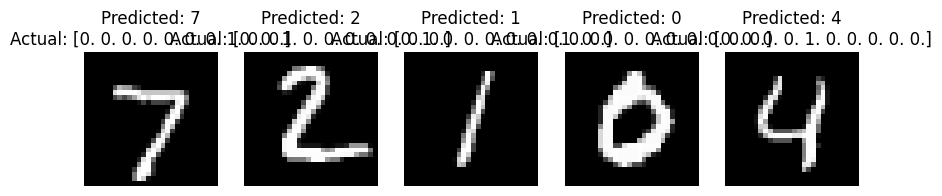

In [30]:
import numpy as np

# Get a few images from the test set
num_images_to_predict = 5
sample_images = x_test[:num_images_to_predict]
sample_labels = y_test[:num_images_to_predict]

# Make predictions
predictions = model.predict(sample_images)

# Print the predictions and the actual labels
print("Predictions:")
print(np.argmax(predictions, axis=1))

print("\nActual Labels:")
print(sample_labels)

# Optionally, visualize the images and their predictions
plt.figure(figsize=(10, 2))
for i in range(num_images_to_predict):
    plt.subplot(1, num_images_to_predict, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {sample_labels[i]}")
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predictions:
[7 2 1 0 4]

Actual Labels:
[7 2 1 0 4]


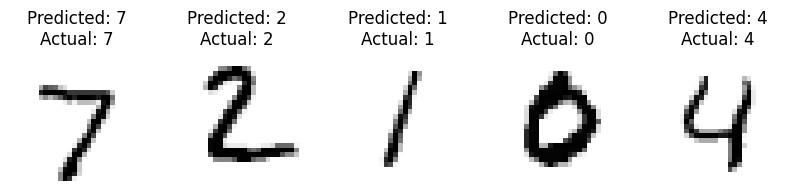

In [35]:
import numpy as np

# Get a few images from the test set
num_images_to_predict = 5
sample_images = x_test[:num_images_to_predict]
sample_labels = y_test[:num_images_to_predict]

# Make predictions
predictions = model.predict(sample_images)

# Convert one-hot encoded actual labels to numerical labels
numerical_sample_labels = np.argmax(sample_labels, axis=1)

# Print the predictions and the actual numerical labels
print("Predictions:")
print(np.argmax(predictions, axis=1))

print("\nActual Labels:")
print(numerical_sample_labels)

# Optionally, visualize the images and their predictions
plt.figure(figsize=(10, 2))
for i in range(num_images_to_predict):
    plt.subplot(1, num_images_to_predict, i + 1)
    plt.imshow(sample_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {numerical_sample_labels[i]}")
    plt.axis('off')
plt.show()

## Save and load a trained model

aving your trained model allows you to reuse it later without having to retrain it. Keras makes this very easy. You can save the entire model, including the optimizer state, weights, and model configuration.

In [36]:
# Save the entire model to a file
model.save('mnist_model.keras')
print("Model saved successfully!")

Model saved successfully!


To load the model later, you can use `tf.keras.models.load_model()`. This will recreate the model from the saved file, including the architecture, weights, and compilation information (optimizer, loss, etc.).

In [37]:
# Load the saved model
loaded_model = tf.keras.models.load_model('mnist_model.keras')
print("Model loaded successfully!")

# You can now use the loaded model to make predictions or evaluate it
# For example, evaluate the loaded model on the test set
loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded model test loss: {loss:.4f}")
print(f"Loaded model test accuracy: {accuracy:.4f}")

Model loaded successfully!
Loaded model test loss: 0.0365
Loaded model test accuracy: 0.9914
